In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL
import seaborn as sns

C:\Users\victo\AppData\Local\Temp\ipykernel_13740\3483273750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def graficar(s: pd.Series, t, resc = None, linea_cero=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=[8,4])
    s.plot(ax=ax)
    ax.set_title(t)
    if resc is not None:        
        y1, y2 = ax.get_ylim()
        resc1 = resc == 1
        ax.fill_between(resc1.index, y1=y1, y2=y2, where=resc1, facecolor='grey', alpha=0.4)
    if linea_cero:
        ax.axhline(y=0,color='grey',linestyle='--')

def graficar2(s1: pd.Series, t1,s2: pd.Series, t2, linea_cero=False):
    fig, ax = plt.subplots(1,2,figsize=[10,4])
    s1.plot(ax=ax[0])
    s2.plot(ax=ax[1])
    ax[0].set_title(t1)
    ax[1].set_title(t2)
    if linea_cero:
        ax[0].axhline(y=0,color='grey',linestyle='--')
        ax[1].axhline(y=0,color='grey',linestyle='--')

def graficar_multiple(df):
    for col in df.columns:
        if col == 'Class':
            graficar(df[col], col)
            continue
        graficar(df[col],col,resc=df['Class'])

def graficar_multiple2(df: pd.DataFrame,figsize=[10,12]):
    cantidad = df.shape[1] -1
    nrows = int(np.ceil(cantidad/2))
    print(cantidad, nrows)
    fig, ax = plt.subplots(nrows=nrows,ncols=2,figsize = figsize)
    for i in range(cantidad):
        col = df.columns[i]
        graficar(df[col],col,resc=df['Class'], ax=ax[int(i/2)][i%2])
    if cantidad%2 != 0:
        ax[-1][-1].set_visible(False)
    plt.tight_layout()

def histograma(df: pd.DataFrame):
    cantidad = df.shape[1] -1
    nrows = int(np.ceil(cantidad/2))
    fig, ax = plt.subplots(nrows=nrows,ncols=2,figsize=[10,12])
    for i in range(cantidad):
        sns.histplot(df[df.columns[i]],bins=20, ax=ax[int(i/2)][i%2])
    if cantidad%2 != 0:
        ax[-1][-1].set_visible(False)
    plt.tight_layout()

# Carga de datos
Se extrayeron los datos de [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/tags/series?t=monthly)

Indicadores Macroeconómicos

In [3]:
df = pd.read_csv('../data/PERU_DATA.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df['Recesion'] = df['Recesion'].astype('int')
df = df.rename(columns={'Recesion':'Class'})
df.head()

,PN02312FM,PN38705PM,PN02028AM,PD37972BM,PD37974BM,PD37976BM,Class
DATE,,,,,,,
1995-02-01,1272.226473,38.433894,55.767947,31.035781,59.493583,42.826815,0
1995-03-01,1495.857345,38.961215,59.344344,30.136709,70.994501,52.061686,0
1995-04-01,1650.980245,39.344815,52.743337,29.452419,70.873138,45.182163,0
1995-05-01,1567.141857,39.673230,63.550977,30.898029,72.091964,51.892059,0
1995-06-01,1452.243775,39.994072,62.733200,32.893440,69.770364,47.712314,0


# Descripción

Características de dataset de macroeconomia

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 1995-02-01 to 2023-10-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PN02312FM  345 non-null    float64
 1   PN38705PM  345 non-null    float64
 2   PN02028AM  345 non-null    float64
 3   PD37972BM  345 non-null    float64
 4   PD37974BM  345 non-null    float64
 5   PD37976BM  345 non-null    float64
 6   Class      345 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 20.2 KB


Metadatos del dataset

In [5]:
df.head()

,PN02312FM,PN38705PM,PN02028AM,PD37972BM,PD37974BM,PD37976BM,Class
DATE,,,,,,,
1995-02-01,1272.226473,38.433894,55.767947,31.035781,59.493583,42.826815,0
1995-03-01,1495.857345,38.961215,59.344344,30.136709,70.994501,52.061686,0
1995-04-01,1650.980245,39.344815,52.743337,29.452419,70.873138,45.182163,0
1995-05-01,1567.141857,39.673230,63.550977,30.898029,72.091964,51.892059,0
1995-06-01,1452.243775,39.994072,62.733200,32.893440,69.770364,47.712314,0


In [6]:
md = pd.read_csv('../data/PERU_METADATA.csv')
md

,Feature,Description
0,PN02312FM,Ingresos corrientes del gobierno central (mill...
1,PN38705PM,Índice de precios Lima Metropolitana (índice D...
2,PN02020AM,Producción manufacturera (índice 2007 = 100) -...
3,PN02028AM,Producción manufacturera (índice 2007 = 100) -...
4,PD37972BM,Indicadores de coyuntura - Volumen de exportac...
5,PD37974BM,Indicadores de coyuntura - Volumen de importac...
6,PD37976BM,Indicadores de coyuntura - Volumen de importac...


Estadisticas descriptivas del dataset

In [7]:
df.describe()

,PN02312FM,PN38705PM,PN02028AM,PD37972BM,PD37974BM,PD37976BM,Class
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,6264.498717,71.345130,98.032040,109.920050,139.707357,112.247380,0.144928
std,3977.255134,17.795622,29.896471,55.644630,70.658768,50.501030,0.352539
min,1272.226473,38.433894,44.000495,27.040935,40.847639,38.761128,0.000000
25%,2433.488853,57.006912,64.649009,54.349526,70.893527,58.335536,0.000000
50%,5722.374394,69.366015,106.904281,107.836572,125.299621,114.954747,0.000000
75%,8825.024532,86.213043,125.705151,149.286642,210.627064,157.445204,0.000000
max,22599.505235,112.061363,145.910567,260.534937,281.894625,215.537749,1.000000


Grafica de las caracteristicas

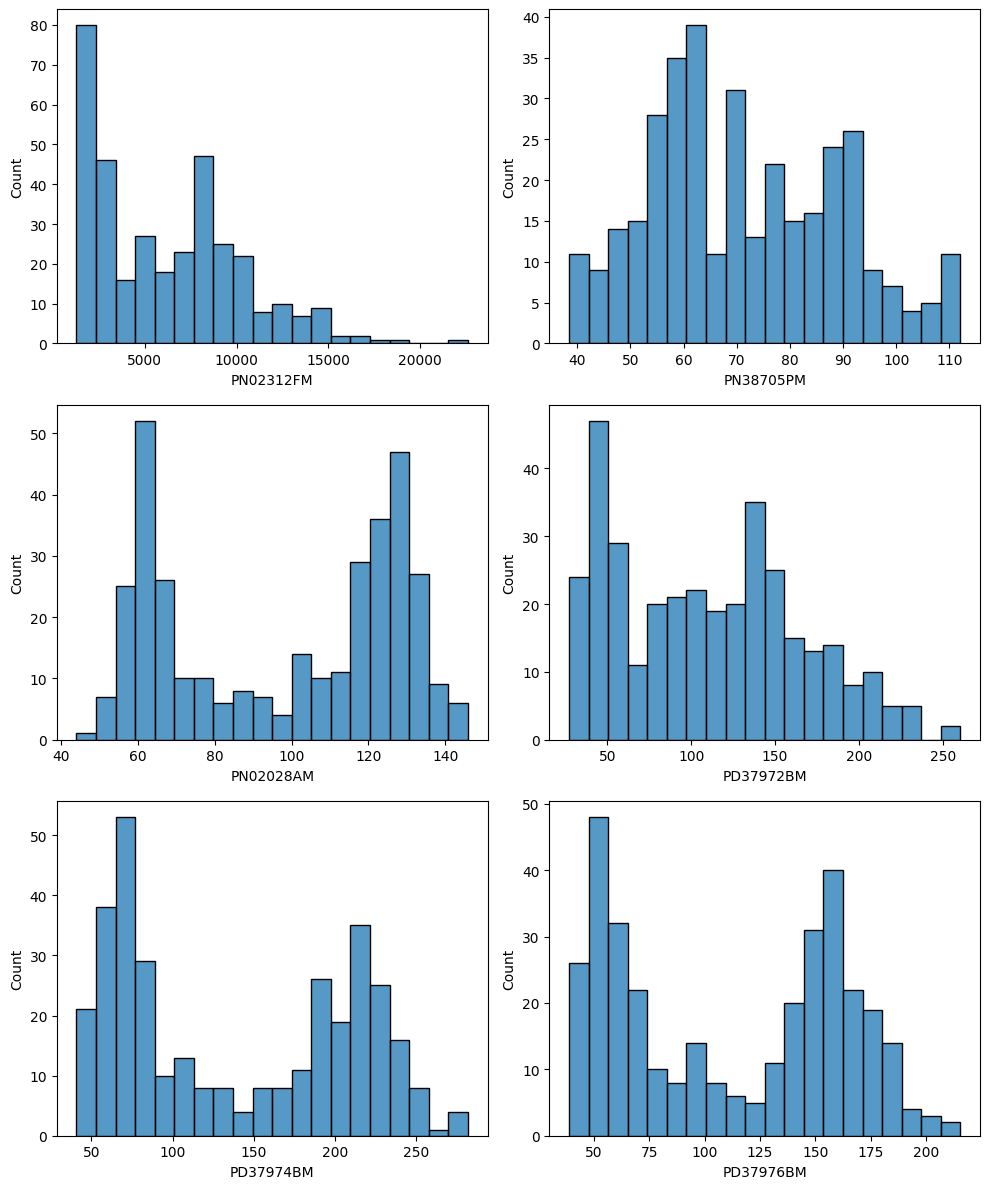

In [8]:
histograma(df)

6 3


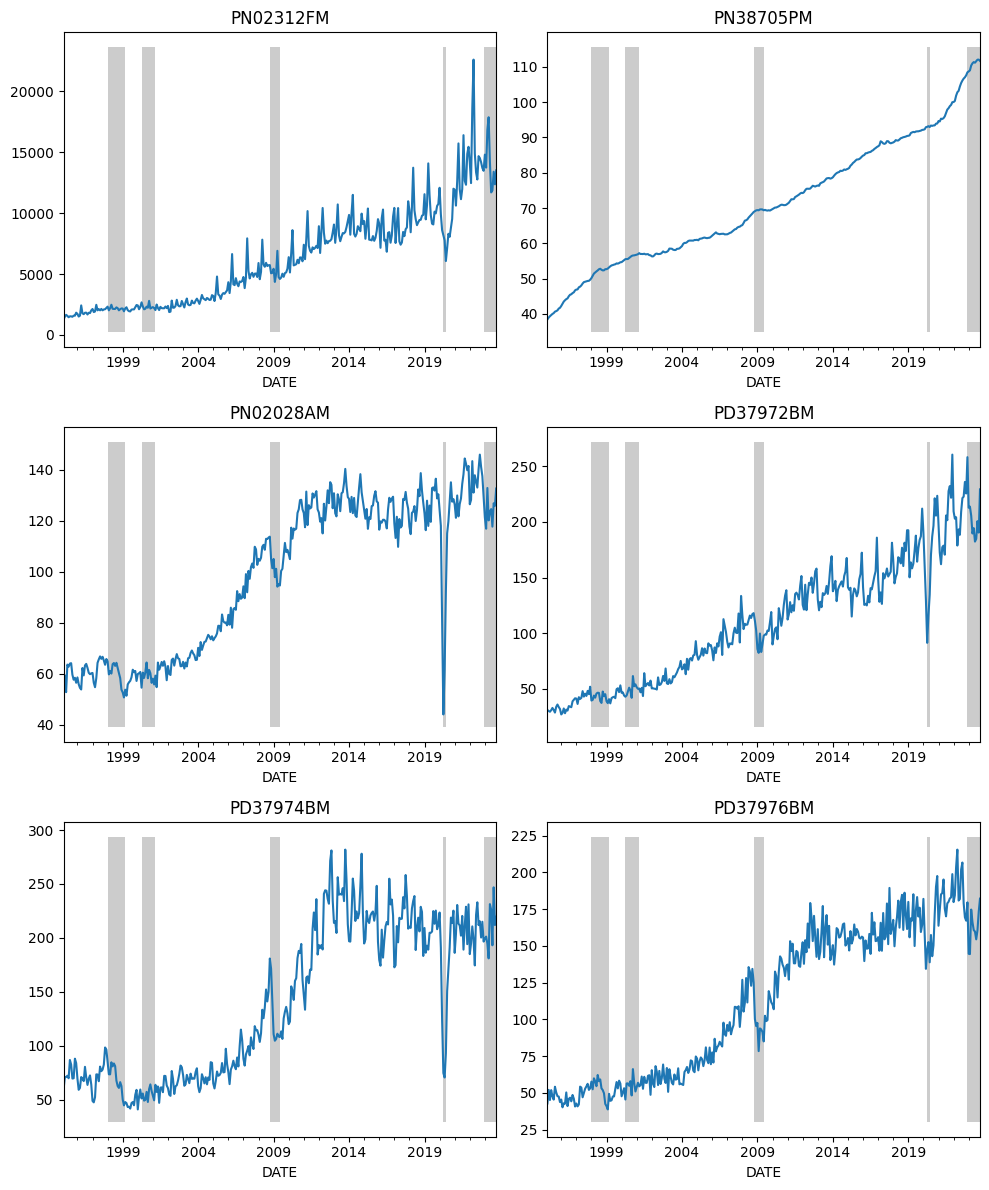

In [9]:
graficar_multiple2(df)

# Preprocesamiento

## Ajuste Estacional

Segun lo anterior, se observa que presentan estacionalidad.
Se procede a realizar un ajuste estacional, descomponiendo la serie y eliminando 
su componente de estacionalidad.

In [10]:
for col in df.columns:
    if col == 'Class':
        continue
    res = STL(df[col], period = 12).fit()
    df[col] = res.trend

## Transformaciones

Se transforma las series a variaciones segun la observacion anterior usando diferencia logaritmica

In [11]:
df_diff = df.copy()
for col in df_diff.columns:
    if col == 'Class':
        continue
    df_diff[col] = np.log(df_diff[col]) - np.log(df_diff[col].shift(1))
df_diff = df_diff.dropna()

# Seleccion de Caracteristicas

In [13]:
corr = df_diff.corr()
corr.style.background_gradient(cmap='coolwarm')

,PN02312FM,PN38705PM,PN02028AM,PD37972BM,PD37974BM,PD37976BM,Class
PN02312FM,1.000000,0.115414,0.810416,0.682369,0.524034,0.607109,-0.451753
PN38705PM,0.115414,1.000000,-0.182728,0.016305,-0.110575,-0.247559,0.017879
PN02028AM,0.810416,-0.182728,1.000000,0.740594,0.707578,0.812894,-0.425269
PD37972BM,0.682369,0.016305,0.740594,1.000000,0.456801,0.696860,-0.409364
PD37974BM,0.524034,-0.110575,0.707578,0.456801,1.000000,0.728591,-0.355469
PD37976BM,0.607109,-0.247559,0.812894,0.696860,0.728591,1.000000,-0.434478
Class,-0.451753,0.017879,-0.425269,-0.409364,-0.355469,-0.434478,1.000000


In [14]:
def features_sel(corr: pd.DataFrame, n_sel):
    cc = corr['Class'].abs().sort_values(ascending=False).drop('Class')
    cc = cc.index.to_list()
    i = 0
    sel = []
    #print(cc)
    while i < n_sel:
        f = cc[0]
        #elimina alto correlacionados
        cc = [e for e in cc if e not in corr[(corr[f].abs()>0.9)].index.to_list()]
        sel.append(f)
        i += 1
    sel.append('Class')
    return sel

In [15]:
df_diff_sel = df_diff[features_sel(corr,5)]
corr2 = df_diff_sel.corr()
corr2.style.background_gradient(cmap='coolwarm')

,PN02312FM,PD37976BM,PN02028AM,PD37972BM,PD37974BM,Class
PN02312FM,1.000000,0.607109,0.810416,0.682369,0.524034,-0.451753
PD37976BM,0.607109,1.000000,0.812894,0.696860,0.728591,-0.434478
PN02028AM,0.810416,0.812894,1.000000,0.740594,0.707578,-0.425269
PD37972BM,0.682369,0.696860,0.740594,1.000000,0.456801,-0.409364
PD37974BM,0.524034,0.728591,0.707578,0.456801,1.000000,-0.355469
Class,-0.451753,-0.434478,-0.425269,-0.409364,-0.355469,1.000000


5 3


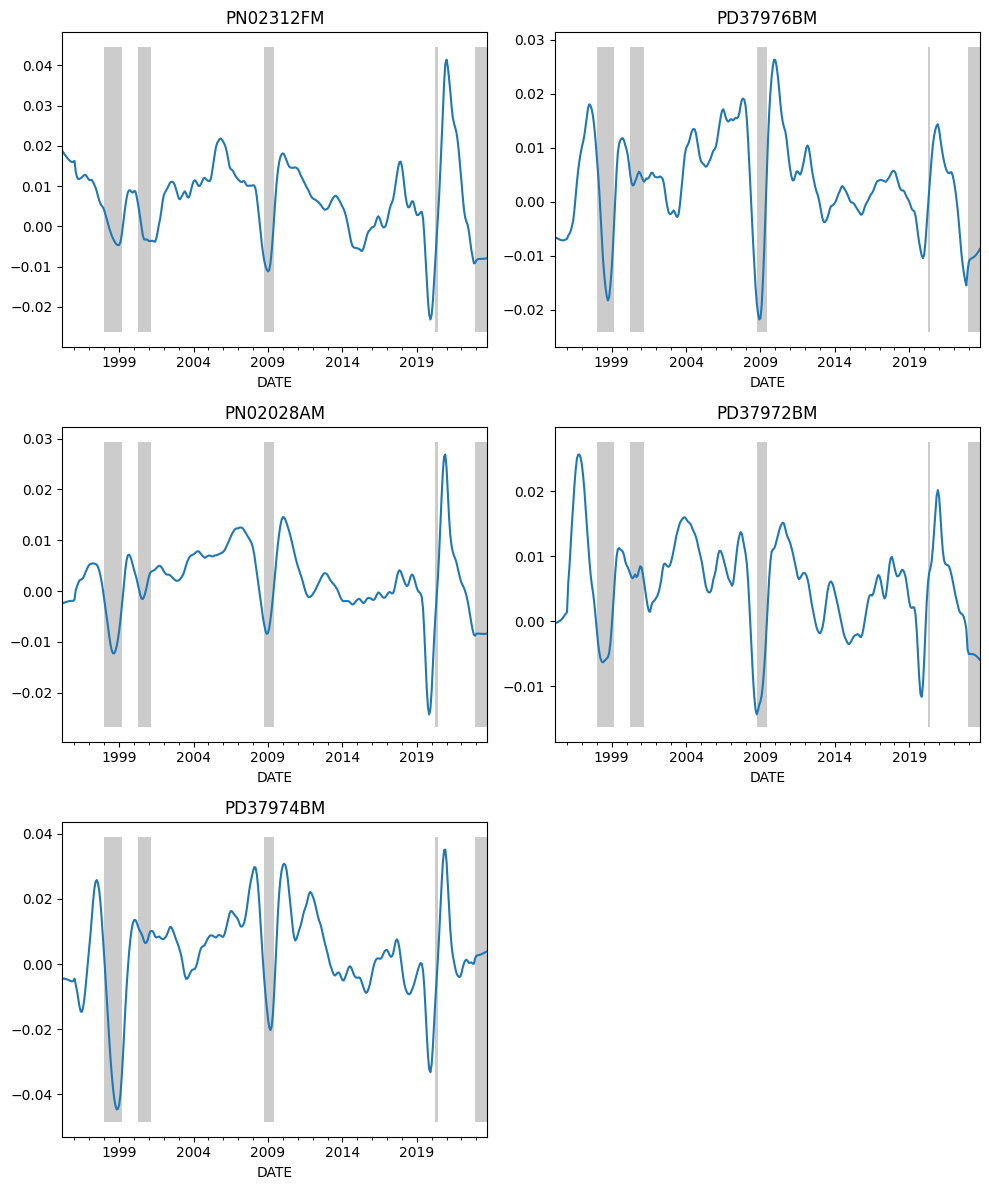

In [16]:
graficar_multiple2(df_diff_sel)

Completar datos interpolando

In [17]:
df_diff_sel.head()

,PN02312FM,PD37976BM,PN02028AM,PD37972BM,PD37974BM,Class
DATE,,,,,,
1995-03-01,0.018757,-0.006579,-0.002390,-0.000309,-0.004451,0
1995-04-01,0.018362,-0.006674,-0.002311,-0.000265,-0.004446,0
1995-05-01,0.017922,-0.006794,-0.002235,-0.000201,-0.004494,0
1995-06-01,0.017489,-0.006922,-0.002158,-0.000108,-0.004590,0
1995-07-01,0.017076,-0.007032,-0.002082,0.000016,-0.004723,0


In [18]:
df_diff_sel.describe()

,PN02312FM,PD37976BM,PN02028AM,PD37972BM,PD37974BM,Class
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.006540,0.003332,0.002009,0.005400,0.002996,0.145349
std,0.009723,0.008992,0.006924,0.007266,0.013820,0.352966
min,-0.023125,-0.021834,-0.024268,-0.014352,-0.044618,0.000000
25%,-0.000013,-0.001842,-0.001570,0.000846,-0.004068,0.000000
50%,0.007247,0.003954,0.002133,0.006201,0.003270,0.000000
75%,0.011854,0.009464,0.006366,0.009691,0.010595,0.000000
max,0.041441,0.026307,0.026851,0.025603,0.035129,1.000000


<Axes: xlabel='DATE'>

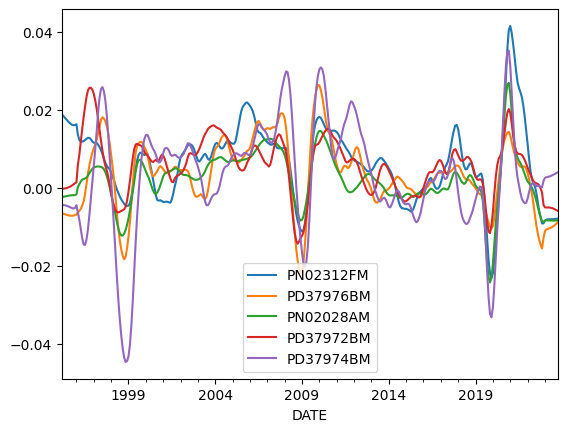

In [19]:
df_diff_sel.drop(labels=['Class'],axis=1).plot()

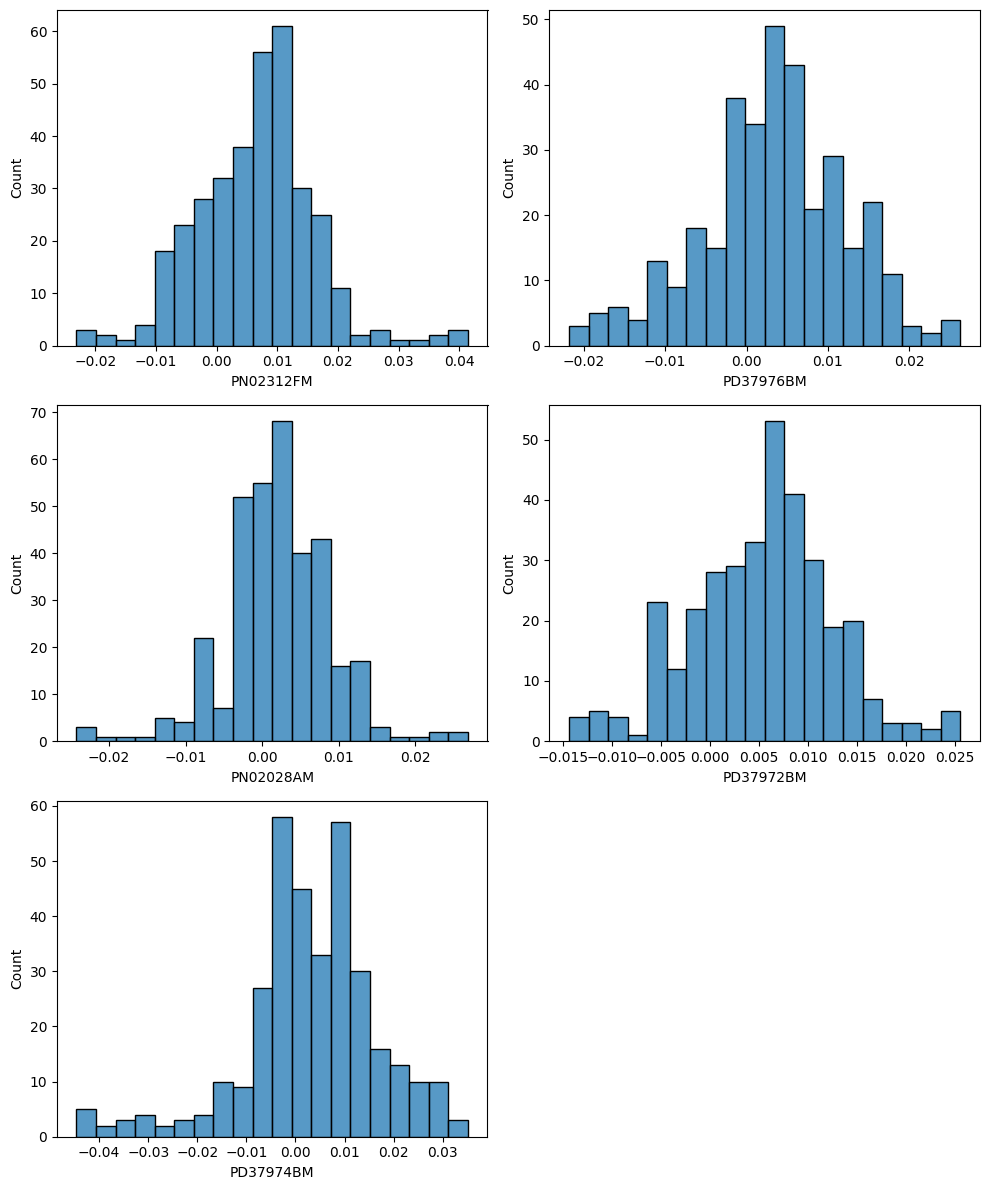

In [20]:
histograma(df_diff_sel)

In [21]:
df_diff_sel.to_csv("../data/PERU_DATA_DIFF.csv")